In [10]:
# Pràctica 2: Llei del refredament

# (Tinc un problema amb el SAGE que de forma aleatoria no em deixa calcular la següent funció en el punt en que 
#  vull fer-ho. La posso aqui al principi per si després em torna a donar problemes)


In [11]:
var("t");T1=function("T1")(t);sol0 =desolve_rk4(diff(T1,t)==-0/(t+1) - 0.005692748626760741*T1 + 0.08539122940141111,\
T1, ics=[0,85], step=0.1, end_points=200)


In [12]:
sol2 =desolve_rk4(diff(T1,t)==-2/(t + 1) - 0.005692748626760741*T1 + 0.08539122940141111,\
T1, ics=[0,85], step=0.1, end_points=200)

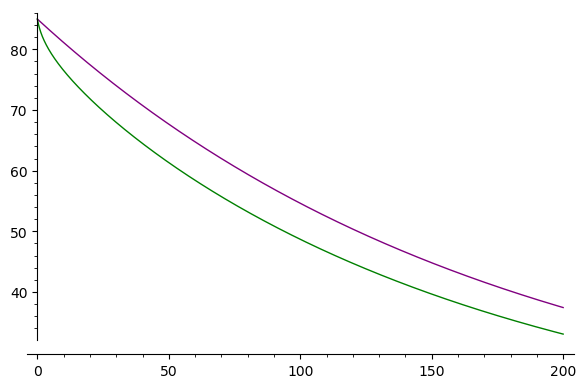

In [13]:
plot0=list_plot(sol0, plotjoined=True, color="purple");
plot2=list_plot(sol2, plotjoined=True, color="green");
plot0+plot2

In [14]:
# 1. El problema del café


In [15]:
reset();Xt=[0, 30 .. 90];Xt


[0, 30, 60, 90]

In [16]:
Yt=[85,73,64,58]


In [17]:
i=var("i")


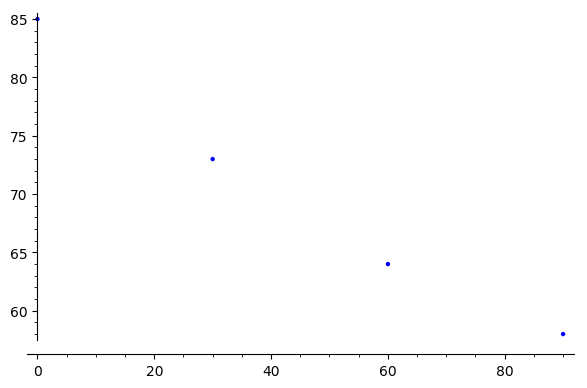

In [18]:
taula=points([[Xt[i],Yt[i]] for i in range(0,len(Xt))]);
show(taula);


In [19]:
dY=[(Yt[i+1]-Yt[i])/(Xt[i+1]-Xt[i]) for i in range(0,len(Xt)-1)];
dYY=[dY[i]/(Yt[i]-15) for i in range(0,len(dY))];


In [20]:
print("t","T(t)","T'(t)","T'(t)/(T(t)-Te");
for i in range(0,len(Xt)-1):
    print(Xt[i],Yt[i],dY[i],dYY[i])
    

t T(t) T'(t) T'(t)/(T(t)-Te
0 85 -2/5 -1/175
30 73 -3/10 -3/580
60 64 -1/5 -1/245


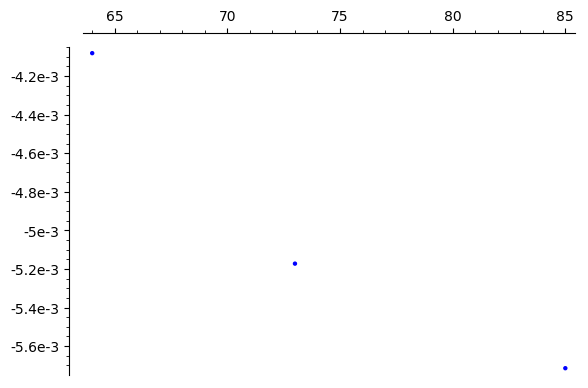

In [21]:
taula0=points([[Yt[i],dYY[i]] for i in range(0,len(dY))]);
show(taula0);


In [22]:
# Com escollim la taxa de refredament?


In [23]:
k=-mean(dYY) #Provem a calcular a0 per la mitjana


In [24]:
reset("t T");var("t");T=function("T")(t)


In [25]:
Te(t)=15


In [26]:
odesol=desolve(diff(T(t),t)==-k*(T(t)-Te(t)),[T,t],[Xt[0],Yt[0]])


In [27]:
odesol


5*(3*e^(709/142100*t) + 14)*e^(-709/142100*t)

In [28]:
expand(odesol)

70*e^(-709/142100*t) + 15

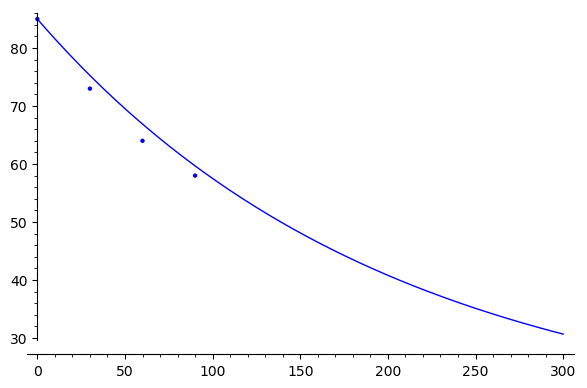

In [29]:
Plot=plot(odesol(t),(t,0,300));Plot+taula


In [30]:
#Sembla una mica desviat de les observacions.  Comprovem la diferencia en minims quadrats


In [31]:
N((odesol(30)-Yt[1])^2+(odesol(60)-Yt[2])^2+(odesol(90)-Yt[3])^2)


16.3098827995792

In [32]:
# Supossem que la TC és la primera observada


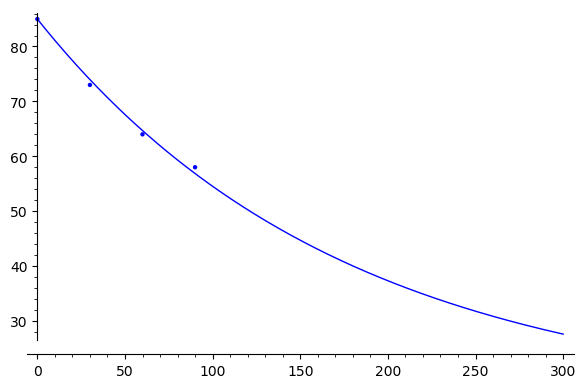

In [33]:
k=-dYY[0];odesol=desolve(diff(T(t),t)==-k*(T(t)-Te(t)),[T,t],[Xt[0],Yt[0]]);
Plot=plot(odesol(t),(t,0,300));Plot+taula


In [34]:
N((odesol(30)-Yt[1])^2+(odesol(60)-Yt[2])^2+(odesol(90)-Yt[3])^2)


2.72123702761990

In [35]:
# Bastant millor pero encara es pot millorar una mica. Provem a forçar que passi pel primer punt


In [36]:
reset("k")


In [37]:
var("k");odesol=desolve(diff(T(t),t)==-k*(T(t)-Te(t)),[T,t],[Xt[0],Yt[0]])


In [38]:
odesol


5*(3*e^(k*t) + 14)*e^(-k*t)

In [39]:
sol=solve(odesol.substitute(t==30)==73,k)


In [40]:
sol


[k == log(1/29*35^(1/30)*29^(29/30)*e^(1/15*I*pi)), k == log(1/29*35^(1/30)*29^(29/30)*e^(2/15*I*pi)), k == log(1/116*35^(1/30)*29^(29/30)*(sqrt(5) + I*sqrt(-2*sqrt(5) + 10) + 1)), k == log(1/29*35^(1/30)*29^(29/30)*e^(4/15*I*pi)), k == log(1/58*I*35^(1/30)*29^(29/30)*sqrt(3) + 1/58*35^(1/30)*29^(29/30)), k == log(1/116*35^(1/30)*29^(29/30)*(sqrt(5) + I*sqrt(2*sqrt(5) + 10) - 1)), k == log(1/29*35^(1/30)*29^(29/30)*e^(7/15*I*pi)), k == log(1/29*35^(1/30)*29^(29/30)*e^(8/15*I*pi)), k == log(-1/116*35^(1/30)*29^(29/30)*(sqrt(5) - I*sqrt(2*sqrt(5) + 10) - 1)), k == log(1/58*I*35^(1/30)*29^(29/30)*sqrt(3) - 1/58*35^(1/30)*29^(29/30)), k == log(1/29*35^(1/30)*29^(29/30)*e^(11/15*I*pi)), k == log(-1/116*35^(1/30)*29^(29/30)*(sqrt(5) - I*sqrt(-2*sqrt(5) + 10) + 1)), k == log(1/29*35^(1/30)*29^(29/30)*e^(13/15*I*pi)), k == log(1/29*35^(1/30)*29^(29/30)*e^(14/15*I*pi)), k == log(-1/29*35^(1/30)*29^(29/30)), k == -14/15*I*pi + log(1/29*35^(1/30)*29^(29/30)), k == -13/15*I*pi + log(1/29*35^(1/30)

In [41]:
len(sol)


30

In [42]:
sol[29].rhs()


log(1/29*35^(1/30)*29^(29/30))

In [43]:
N(_)


0.00626840771676472

In [44]:
odesol


5*(3*e^(k*t) + 14)*e^(-k*t)

In [45]:
odesol.substitute(k=sol[29].rhs())


5*(3*(1/29*35^(1/30)*29^(29/30))^t + 14)/(1/29*35^(1/30)*29^(29/30))^t

In [46]:
expand(_)

70/(35^(1/30*t)*29^(29/30*t)*1^t*(1/29)^t) + 15

verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 60 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: '(34, 'Numerical result out of range')'


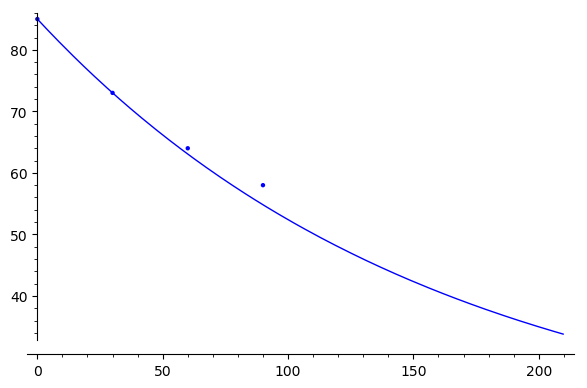

In [47]:
Plot=plot(odesol.substitute(k=sol[29].rhs()),(t,0,300));Plot+taula


In [48]:
N((odesol.substitute(k==sol[29].rhs(),t==30)-Yt[1])^2+\
(odesol.substitute(k==sol[29].rhs(),t==60)-Yt[2])^2+\
(odesol.substitute(k==sol[29].rhs(),t==90)-Yt[3])^2)


11.0091688463140

In [49]:
# No es millor que la opció 2. Tractem de millorar si forcem que sigui la millor solució del tipus previst 
# amb la mesura dels mínims quadrats.


In [50]:
model(t)=70*e^(-k*t) + 15


In [51]:
llista=[[Xt[i],Yt[i]] for i in range(0,len(Xt))]; llista


[[0, 85], [30, 73], [60, 64], [90, 58]]

In [52]:
exp0=find_fit(llista,model)


In [53]:
exp0


[k == 1.0]

In [54]:
# Curiosament, el find_fit no funciona correctament si forcem el signe negatiu al exponent


In [55]:
var("k1");model(t)=70*e^(k1*t) + 15;exp0=find_fit(llista,model);exp0


[k1 == -0.005692748626760741]

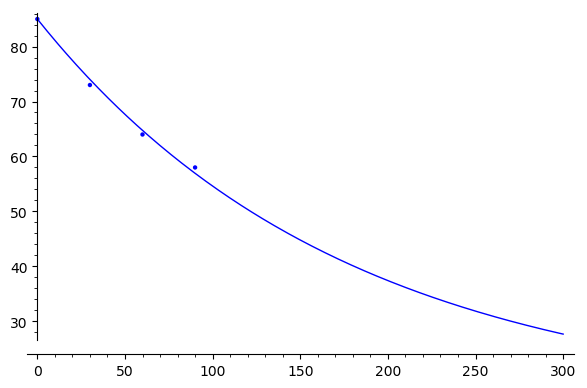

In [56]:
Plot=plot(odesol.substitute(k=-exp0[0].rhs()),(t,0,300));Plot+taula


In [57]:
N((odesol.substitute(k==-exp0[0].rhs(),t==30)-Yt[1])^2+\
(odesol.substitute(k==-exp0[0].rhs(),t==60)-Yt[2])^2+\
(odesol.substitute(k==-exp0[0].rhs(),t==90)-Yt[3])^2)


2.70914339294615

In [58]:
# Sembla la millor opció tot i que és molt semblant a la segona. Ens quedem amb aquesta
# La solució és una exponencial decreixent. Per tant, decreix monotonament.  
# Si la temperatura inicial del café fos inferior a l'exterior (granissat?), seria creixent.  
# La assímptota és:


In [59]:
lim(odesol.substitute(k=-exp0[0].rhs()), t=oo)


15

In [60]:
odesol.substitute(k=-exp0[0].rhs(),t=300)


27.68817749530574

In [61]:
odesol.substitute(k=-exp0[0].rhs())==35


5*(3*e^(0.005692748626760741*t) + 14)*e^(-0.005692748626760741*t) == 35

In [62]:
# solve(_,t) #no sembla funcionar


In [63]:
expand(odesol.substitute(k=-exp0[0].rhs())==35)

70*e^(-0.005692748626760741*t) + 15 == 35

In [64]:
#solve(_,t) #ni així tampoc. Ho faig manualment

In [65]:
N(log(20/70)/(-0.005692748626760741))


220.062934556134

In [66]:
# 2. El problema de mantenir el café calent


In [67]:
odesol


5*(3*e^(k*t) + 14)*e^(-k*t)

In [68]:
odesol.substitute(t==600)==30


5*(3*e^(600*k) + 14)*e^(-600*k) == 30

In [69]:
expand(_)

70*e^(-600*k) + 15 == 30

In [70]:
log(15./70)/600
    

-0.00256740840157858

In [71]:
# Fixem la k al valor experimental trovat per seguir la resta d'exercicis


In [72]:
k=-exp0[0].rhs()


In [73]:
k


0.005692748626760741

In [74]:
var("q");odesol2=desolve(diff(T(t),t)==q-k*(T(t)-Te(t)),[T,t],[Xt[0],Yt[0]])


In [75]:
odesol2


5/857396*(3*(10040797*q + 857396)*e^(857396/150611955*t) - 30122391*q + 12003544)*e^(-857396/150611955*t)

In [76]:
expand(_)

-150611955/857396*q*e^(-857396/150611955*t) + 150611955/857396*q + 70*e^(-857396/150611955*t) + 15

In [77]:
odesol2.substitute(t=600)==30


5/857396*(3*(10040797*q + 857396)*e^(34295840/10040797) - 30122391*q + 12003544)*e^(-34295840/10040797) == 30

In [78]:
show(_)

5/857396*(3*(10040797*q + 857396)*e^(34295840/10040797) - 30122391*q + 12003544)*e^(-34295840/10040797) == 30

In [79]:
solve(_,q)


[q == 857396/30122391*(3*e^(34295840/10040797) - 14)/(e^(34295840/10040797) - 1)]

In [80]:
_[0].rhs().n()


0.0747548076763167

In [81]:
lim(odesol2, t=oo)


150611955/857396*q + 15

In [82]:
solve(_==30,q)


[q == (857396/10040797)]

In [83]:
_[0].rhs().n()


0.0853912294014111

In [84]:
#3 El problema del café amb gel

In [85]:
# Si possem un glaçó, la transferència de temperatura del gel al café està en funció de la superficie 
# que té el glaçó en cada moment. Al reduir-se la superficie, la transferència també es redueix. Per tant, 
# és normal que el model acabi dient que el glaçó acaba sent de mida infinitessimal, i que de fet no 
# s'acabi de fondre mai.

# Per tant, la funció que busquem ha de ser tal que resti temperatura i tendeixi cap a zero. 

# Proposem doncs una q(t)=c/(t+1) amb c<0 (el +1 al denominador es per evitar que resti una quantitat 
# infinita al segon 0)

#Es poden fer models més precissos en funció de la forma, i altres paràmetres del glaçó.

# El SAGE no s'en surt amb la resolució, 


In [86]:
var("c k t");T=function("T")(t);
# odesol3=desolve(diff(T(t),t)==c/(t+1)-k*(T(t)-Te(t)),[T,t],[Xt[0],Yt[0]])

#Aquesta equació diferencial no te una solució que es pugui expressar en termes de funcions elementals.


In [87]:
c-k*(T(t)-Te(0))


-k*(T(t) - 15) + c

In [88]:
T1=function("T1")(t);


In [89]:
(- k*(T(t) -Te(0))+ c/(t+1)).substitute(k=-exp0[0].rhs(),c=-2)


-2/(t + 1) - 0.005692748626760741*T(t) + 0.08539122940141111

In [90]:
odesol3num0=desolve_rk4(diff(T1,t)==(- k*(T1 -Te(t))+ c/(t+1)).substitute(k=-exp0[0].rhs(),c=0),\
T1,ics=[0,85], step=0.1, end_points=300);


In [91]:
odesol3num2=desolve_rk4(diff(T1,t)==(- k*(T1 -Te(t))+ c/(t+1)).substitute(k=-exp0[0].rhs(),c=-2),\
T1,ics=[0,85], step=0.1, end_points=300);

In [92]:
odesol3num0

[[0, 85],
 [0.1, 84.96016210004606],
 [0.2, 84.92034687235316],
 [0.3, 84.88055430401822],
 [0.4, 84.84078438214551],
 [0.5, 84.80103709384665],
 [0.6000000000000001, 84.76131242624055],
 [0.7000000000000001, 84.72161036645352],
 [0.8, 84.68193090161914],
 [0.9, 84.64227401887834],
 [1.0, 84.60263970537935],
 [1.1, 84.56302794827772],
 [1.2, 84.52343873473633],
 [1.3, 84.48387205192535],
 [1.4, 84.44432788702224],
 [1.5, 84.40480622721178],
 [1.6, 84.36530705968603],
 [1.7, 84.32583037164434],
 [1.8, 84.28637615029335],
 [1.9, 84.24694438284696],
 [2.0, 84.20753505652638],
 [2.1, 84.16814815856009],
 [2.2, 84.1287836761838],
 [2.3, 84.08944159664053],
 [2.4, 84.05012190718051],
 [2.5, 84.01082459506128],
 [2.6, 83.9715496475476],
 [2.7, 83.9322970519115],
 [2.8, 83.89306679543222],
 [2.9, 83.85385886539626],
 [3.0, 83.81467324909737],
 [3.1, 83.7755099338365],
 [3.2, 83.73636890692185],
 [3.3, 83.69725015566884],
 [3.4, 83.65815366740009],
 [3.5, 83.61907942944545],
 [3.6, 83.580027429

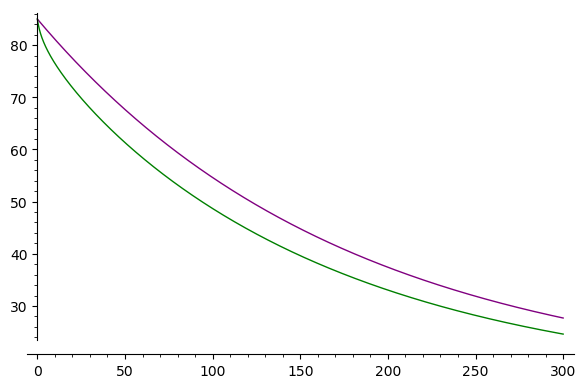

In [93]:
plot0=list_plot(odesol3num0, plotjoined=True, color="purple");
plot2=list_plot(odesol3num2, plotjoined=True, color="green")
plot0+plot2


## 4 La temperatura d'un habitatge amb calefacció


In [94]:
reset("k");var("Tmax Tmin w k");Te(t)=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*t)


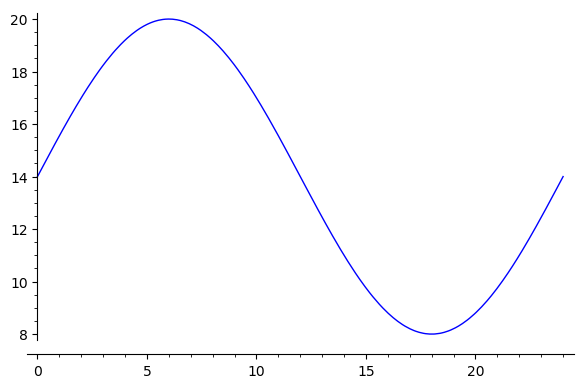

In [95]:
plot(Te(t).substitute(Tmax=20,Tmin=8,w=pi/12),(t,0,24))

In [96]:
#Podem corregir la fórmula del Te(t) per tal de que t=0 correspongui a les 0:00
# Te(t)=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*(t-8))

# Si ho deixem tal i com està, aleshores hem de considerar que el t=0 correspon aproximadament a les 8:00 per
# tal que la fórmula proposada sigui coherent


In [97]:
T=function("T")(t);odesol4=desolve(diff(T(t),t)==q-k*(T(t)-Te(t)),[T,t],[0,30])


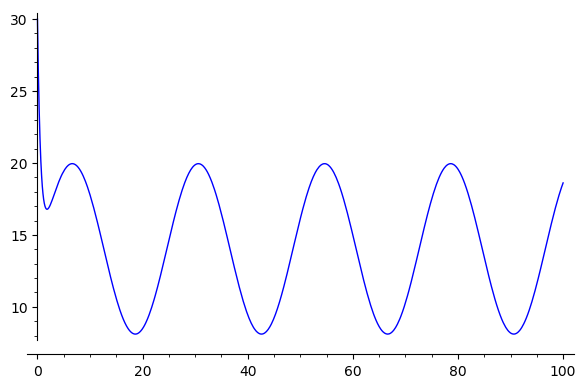

In [128]:
plot(odesol4.substitute(Tmax=20,Tmin=8,q=0.05,k=1.6,w=pi/12),(t,0,100))

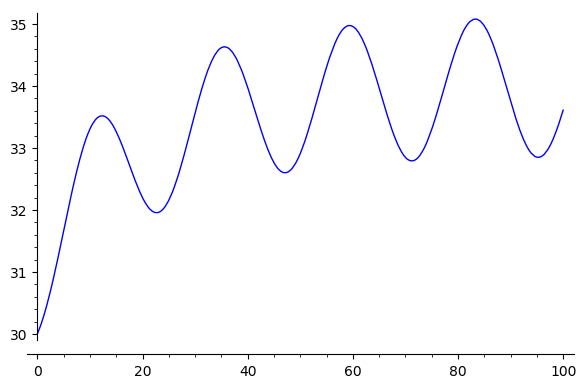

In [134]:
plot(odesol4.substitute(Tmax=20,Tmin=8,q=1.0,k=0.05,w=pi/12),(t,0,100))

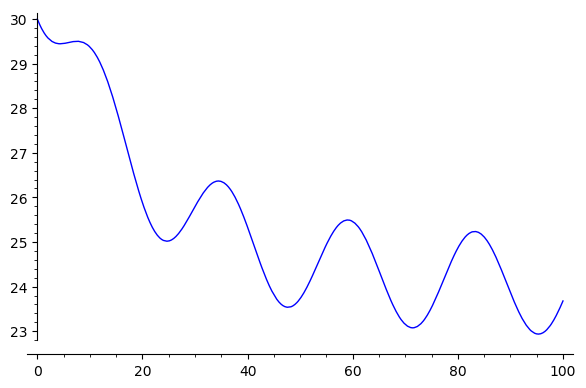

In [130]:
plot(odesol4.substitute(Tmax=20,Tmin=8,q=0.5,k=0.05,w=pi/12),(t,0,100))


In [101]:
odesol4


-1/2*((Tmax - Tmin)*k^2*w*cos(t*w)*e^(k*t) - (Tmax - Tmin)*k^3*e^(k*t)*sin(t*w) + (Tmax + Tmin - 60)*k^3 - (Tmax - Tmin)*k^2*w + 2*k^2*q + ((Tmax + Tmin - 60)*k - ((Tmax + Tmin)*k + 2*q)*e^(k*t) + 2*q)*w^2 - ((Tmax + Tmin)*k^3 + 2*k^2*q)*e^(k*t))/(k^3*e^(k*t) + k*w^2*e^(k*t))

In [102]:
test=factor(odesol4)


In [103]:
test2=denominator(test);test2.factor()


2*(k^2 + w^2)*k

In [104]:
test1=numerator(test);test1.factor()


-(Tmax*k^2*w*cos(t*w)*e^(k*t) - Tmin*k^2*w*cos(t*w)*e^(k*t) - Tmax*k^3*e^(k*t)*sin(t*w) + Tmin*k^3*e^(k*t)*sin(t*w) - Tmax*k^3*e^(k*t) - Tmin*k^3*e^(k*t) - Tmax*k*w^2*e^(k*t) - Tmin*k*w^2*e^(k*t) + Tmax*k^3 + Tmin*k^3 - Tmax*k^2*w + Tmin*k^2*w + Tmax*k*w^2 + Tmin*k*w^2 - 2*k^2*q*e^(k*t) - 2*q*w^2*e^(k*t) - 60*k^3 + 2*k^2*q - 60*k*w^2 + 2*q*w^2)*e^(-k*t)

In [105]:
test11=factor(-(Tmax*k^2*w*cos(t*w)*e^(k*t) - Tmin*k^2*w*cos(t*w)*e^(k*t) - Tmax*k^3*e^(k*t)*sin(t*w) +\
Tmin*k^3*e^(k*t)*sin(t*w) - Tmax*k^3*e^(k*t) - Tmin*k^3*e^(k*t) - Tmax*k*w^2*e^(k*t) - Tmin*k*w^2*e^(k*t) - 2*k^2*q*e^(k*t) - 2*q*w^2*e^(k*t))*e^(-k*t));
test11


-Tmax*k^2*w*cos(t*w) + Tmin*k^2*w*cos(t*w) + Tmax*k^3*sin(t*w) - Tmin*k^3*sin(t*w) + Tmax*k^3 + Tmin*k^3 + Tmax*k*w^2 + Tmin*k*w^2 + 2*k^2*q + 2*q*w^2

In [106]:
test12=-(Tmax*k^3 + Tmin*k^3 - Tmax*k^2*w + Tmin*k^2*w + Tmax*k*w^2 + Tmin*k*w^2 - 34*k^3 + 2*k^2*q -\
34*k*w^2 + 2*q*w^2)*e^(-k*t);
test12


-(Tmax*k^3 + Tmin*k^3 - Tmax*k^2*w + Tmin*k^2*w + Tmax*k*w^2 + Tmin*k*w^2 - 34*k^3 + 2*k^2*q - 34*k*w^2 + 2*q*w^2)*e^(-k*t)

In [107]:
odesol4=desolve(diff(T(t),t)==q-k*(T(t)-Te(t)),[T,t],[0,30])


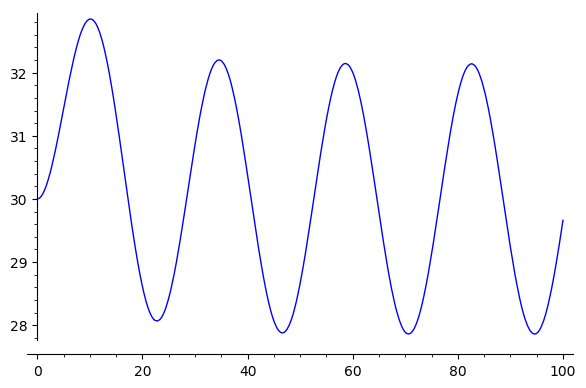

In [108]:
plot(odesol4.substitute(Tmax=20,Tmin=8,q=1.6,k=0.1,w=pi/12),(t,0,100))


In [109]:
test11/test2


-1/2*(Tmax*k^2*w*cos(t*w) - Tmin*k^2*w*cos(t*w) - Tmax*k^3*sin(t*w) + Tmin*k^3*sin(t*w) - Tmax*k^3 - Tmin*k^3 - Tmax*k*w^2 - Tmin*k*w^2 - 2*k^2*q - 2*q*w^2)/((k^2 + w^2)*k)

In [110]:
factor(-1/2*(- Tmax*k^3 - Tmin*k^3 - Tmax*k*w^2 - Tmin*k*w^2 - 2*k^2*q - 2*q*w^2)/((k^2 + w^2)*k))


1/2*(Tmax*k + Tmin*k + 2*q)/k

In [111]:
(_).substitute(Tmax=20,Tmin=8,q=8/5,k=1/10,w=pi/12)


30

In [112]:
oscil(t)=factor(-1/2*(Tmax*k^2*w*cos(t*w) - Tmin*k^2*w*cos(t*w) - Tmax*k^3*sin(t*w) +\
Tmin*k^3*sin(t*w))/((k^2 + w^2)*k))


In [113]:
oscil(t)


-1/2*(w*cos(t*w) - k*sin(t*w))*(Tmax - Tmin)*k/(k^2 + w^2)

In [114]:
der(t)=diff(oscil(t),t);der(t)


1/2*(k*w*cos(t*w) + w^2*sin(t*w))*(Tmax - Tmin)*k/(k^2 + w^2)

In [115]:
solve(k*cos(t*w) + w*sin(t*w)==0,t)


[sin(t*w) == -k*cos(t*w)/w]

In [116]:
assume(t*w<pi/2,t*w>0);solve(k*cos(t*w) + w*sin(t*w)==0,t)


[sin(t*w) == -k*cos(t*w)/w]

In [117]:
solt=arctan(-k/w)/w


In [118]:
extrem(k)=solt.substitute(Tmax=20,Tmin=8,q=8/5,w=pi/12);extrem(k)


12*arctan(-12*k/pi)/pi

In [119]:
extrem(1/10)


-12*arctan(6/5/pi)/pi

In [120]:
der(solt)


0

In [121]:
der(solt+2*pi/w)


0

In [122]:
solt2=arctan(-k/w)/w+pi/w


In [123]:
simplify(der(solt2))


0

In [124]:
oscil(solt).substitute(Tmax=20,Tmin=8,q=8/5,k=1/10,w=pi/12)


-36*(25*pi/sqrt(36/pi^2 + 25) + 36/(pi*sqrt(36/pi^2 + 25)))/(25*pi^2 + 36)

In [125]:
n(_)


-2.14096116380261

In [126]:
oscil(solt2).substitute(Tmax=20,Tmin=8,q=8/5,k=1/10,w=pi/12)


-36*(5*pi*cos(pi - arctan(6/5/pi)) - 6*sin(pi - arctan(6/5/pi)))/(25*pi^2 + 36)

In [127]:
n(_)


2.14096116380261

In [129]:
amplitud=2*_


In [130]:
amplitud


4.28192232760523

In [133]:
famp(k)=2*oscil(solt2).substitute(Tmax=20,Tmin=8,q=8/5,w=pi/12)


In [134]:
famp(k)


-144*(pi*cos(pi + arctan(-12*k/pi)) - 12*k*sin(pi + arctan(-12*k/pi)))*k/(pi^2 + 144*k^2)

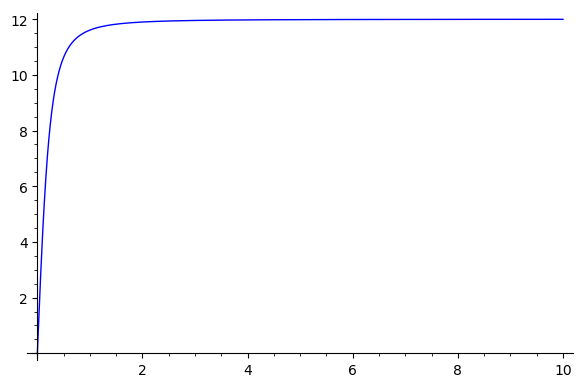

In [135]:
plot(famp(k),k,0,10)


In [144]:
graf1=plot(Te(t).substitute(Tmax=20,Tmin=8,q=8/5,k=1/10,w=pi/12),(t,0,100),color="red")


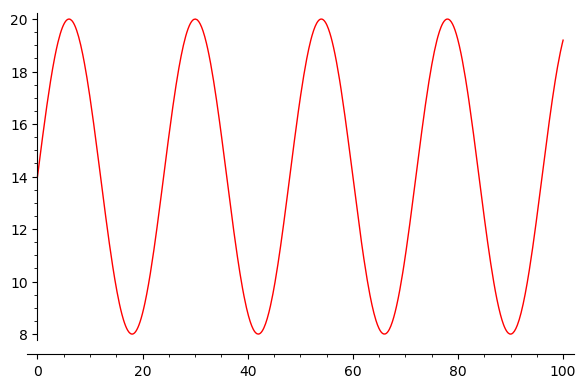

In [145]:
graf1


In [146]:
graf2=plot(odesol4.substitute(Tmax=20,Tmin=8,q=1.6,k=1,w=pi/12),(t,0,100))


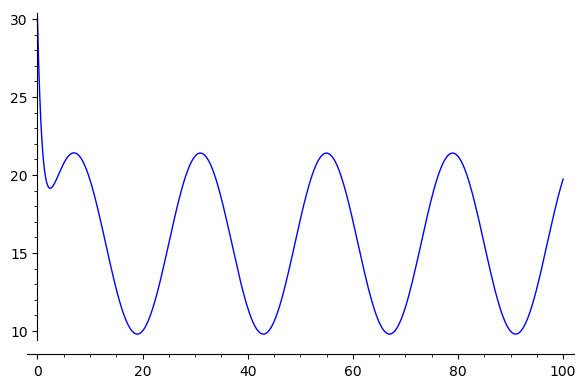

In [147]:
graf2


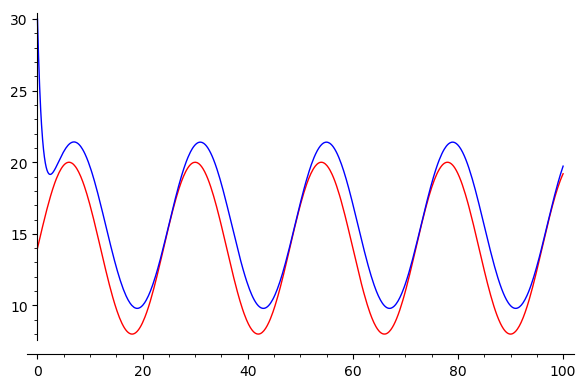

In [148]:
graf1+graf2


In [149]:
desfa(k)=extrem(k)+2*pi-pi/4*w


In [150]:
n(desfa(1/10).substitute(w=pi/12))


4.68387187813531

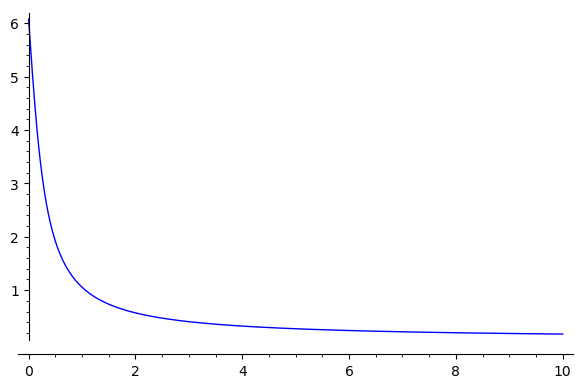

In [151]:
plot(desfa(k).substitute(w=pi/12),k,0,10)


In [152]:
# 5. INFORME: La temperatura d'un habitatge/oficina amb calefacció regulada per un temporitzador

In [1]:
# Es poden proposar molts models de temporitzador. Podem fer un model de SI/NO on està connectat unes hores i
# desconnectat unes altres. Les hores de connexió no tenen per què coincidir exactament amb les de treball.
# Es pot proposar un model oscil·latori en el que la  calefacció passarà de 0 a 100% en un cicle de 24 hores.
# També pot haver-hi un decalatge entre  el temporitzador i l'exterior. Depenent del model escollit, la equació
# diferencial pot ser integrable de forma analítica, o només serà resoluble de forma numèrica.

# El cost energètic de la calefacció estarà en funció de l'àrea de la funció del temporitzador. L'objectiu és
# com sempre, minimitzar el cost sempre i que es respectin un màxims i mínims de temperatura ambient.

# Ens posem en el cas de la secció anterior amb Tmax=20, Tmin=8, k=1/10 i fem el desplaçament de vuit hores
# per qué sigui més senzill llegir els resultats.

# Ens demanen que la oficina, entre les 9:00 i les 18:00 estigui entre 18 i 22 graus

# Trobar la solució òptima pot ser bastant complicat. Ens conformen amb unes aproximacions numèriques que compleixin
# les condicions demanades.


In [82]:
w=pi/12;Tmax=20;Tmin=8;Te(t)=(Tmax+Tmin)/2+(Tmax-Tmin)/2*sin(w*(t-8))

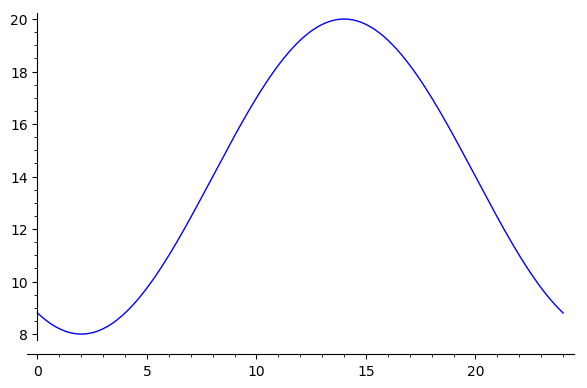

In [83]:
plot(Te(t),(t,0,24))

In [84]:
# Proposem una funció del tipus


In [85]:
var("q1 q2");q(t)=q1*(sin(w*(t-8+q2))+1)/2;
q(7).substitute(q1=1.6,q2=7)

1.60000000000000

In [86]:
q(13).substitute(q1=1.6,q2=7)

0.800000000000000

In [87]:
q(19).substitute(q1=1.6,q2=7)

0

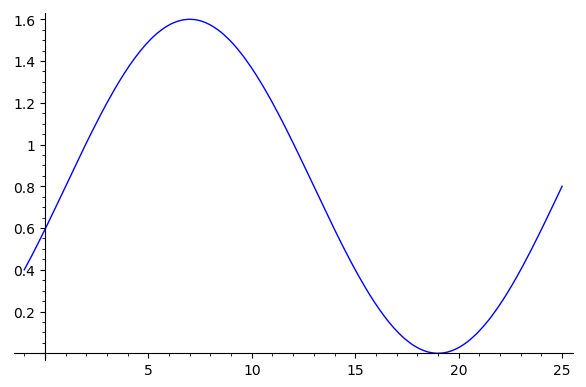

In [23]:
plot(q(t).substitute(q1=1.6,q2=7),t,-1,25)

# És a dir, q2 hores abans de les 8 tenim la potència al 100% 6 hores més tard estem al 50%, i 12 hores més tard al 0%
# i d'aquí tornem a pujar.



In [26]:
var("k");T=function("T")(t);odesol5=desolve(diff(T(t),t)==q(t)-k*(T(t)-Te(t)),[T,t],[0,24])


In [27]:
odesol5


-1/2*(12*pi*k*q1*cos(-2/3*pi + 1/12*pi*q2 + 1/12*pi*t)*e^(k*t) + 144*pi*k^2*cos(-2/3*pi + 1/12*pi*t)*e^(k*t) - 144*k^2*q1*e^(k*t)*sin(-2/3*pi + 1/12*pi*q2 + 1/12*pi*t) - 1728*k^3*e^(k*t)*sin(-2/3*pi + 1/12*pi*t) - 288*k^3*(3*sqrt(3) + 10) - 12*pi*k*q1*cos(-2/3*pi + 1/12*pi*q2) + 144*k^2*q1*sin(-2/3*pi + 1/12*pi*q2) - 20*pi^2*k + 72*pi*k^2 + (pi^2 + 144*k^2)*q1 - (28*pi^2*k + 4032*k^3 + (pi^2 + 144*k^2)*q1)*e^(k*t))*e^(-k*t)/(pi^2*k + 144*k^3)

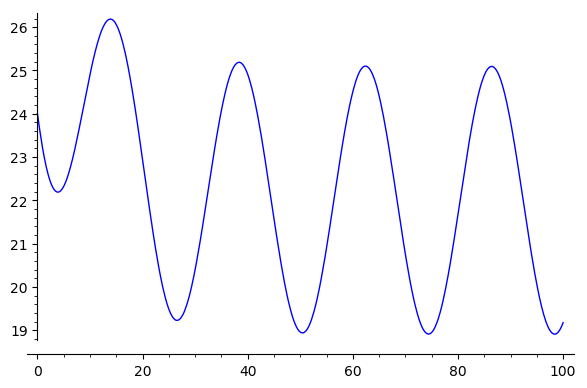

In [28]:
plot(odesol5.substitute(q1=1.6,q2=7,k=1/10),(t,0,100))


In [33]:
# Els dos primer dies encara no son significatius. Estudiem el tercer dia.


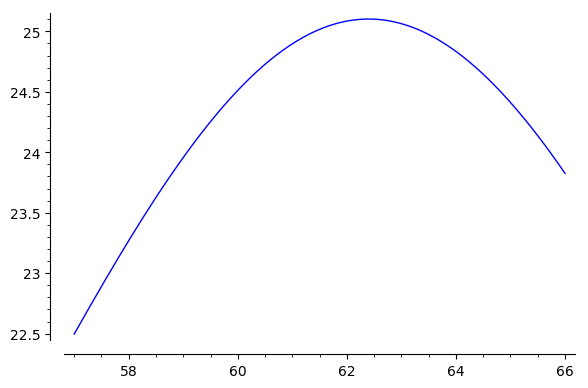

In [34]:
plot(odesol5.substitute(q1=1.6,q2=7,k=1/10),(t,9+48,9+48+9))


In [31]:
n(odesol5.substitute(q1=1.6,q2=7,k=1/10,t=9+48))


22.4963969750410

In [35]:
n(odesol5.substitute(q1=1.6,q2=7,k=1/10,t=9+48+9))


23.8264667044786

In [ ]:
#Estem posant massa calor. Possiblement haurem de rebaixar la q1. 

# Cost energètic de la calefacció:


In [71]:
integral(q(t).substitute(q1=1.6,q2=7),(t,0,24))


19.200000000000003

In [48]:
deriv=diff(odesol5,t).substitute(q1=1.6,q2=7,k=1/10)


In [49]:
find_root(deriv,50,60)


50.416936919916374

In [47]:
n(odesol5.substitute(q1=1.6,q2=7,k=1/10,t=50.416936919916374))


18.9357400323646

In [ ]:
# Això és un mínim


In [88]:
find_root(deriv,60,70)

62.39907664238713

In [51]:
n(odesol5.substitute(q1=1.6,q2=7,k=1/10,t=62.39907664238713))


25.1021447225014

In [ ]:
# Això és el màxim.


In [90]:
deriv


1/10*(90*pi + 240.000000000000*pi*cos(-1/12*pi + 1/12*pi*t)*e^(1/10*t) + 180*pi*cos(-2/3*pi + 1/12*pi*t)*e^(1/10*t) - 50.0000000000000*pi^2 - 60.0000000000000*pi*(sqrt(6) + sqrt(2)) - 125*(4.40000000000000*pi^2 + 6.33600000000000)*e^(1/10*t) - 288.000000000000*e^(1/10*t)*sin(-1/12*pi + 1/12*pi*t) - 216*e^(1/10*t)*sin(-2/3*pi + 1/12*pi*t) - 72.0000000000000*sqrt(6) - 108*sqrt(3) + 72.0000000000000*sqrt(2) - 72.0000000000000)*e^(-1/10*t)/(25*pi^2 + 36) - 1/10*(-200.000000000000*pi^2*e^(1/10*t)*sin(-1/12*pi + 1/12*pi*t) - 150*pi^2*e^(1/10*t)*sin(-2/3*pi + 1/12*pi*t) - 125*(4.40000000000000*pi^2 + 6.33600000000000)*e^(1/10*t) - 288.000000000000*e^(1/10*t)*sin(-1/12*pi + 1/12*pi*t) - 216*e^(1/10*t)*sin(-2/3*pi + 1/12*pi*t))*e^(-1/10*t)/(25*pi^2 + 36)

In [53]:
solve(deriv==0,t)


[e^(1/10*t) == -1/5*(45*pi - 25*pi^2 - 30*sqrt(6)*pi - 30*sqrt(2)*pi - 36*sqrt(6) - 54*sqrt(3) + 36*sqrt(2) - 36)/(20*pi^2*sin(-1/12*pi + 1/12*pi*t) + 15*pi^2*sin(-2/3*pi + 1/12*pi*t) + 24*pi*cos(-1/12*pi + 1/12*pi*t) + 18*pi*cos(-2/3*pi + 1/12*pi*t))]

In [69]:
# Si no podem solucionar de forma exacte el valor de t dels extrems, menys encara podem tractar de resoldre un sistema
# on volem trobar la q1 per tal de que el màxim sigui 22. Podem mirar d'acostar-nos numèricament.
# Desprès de algunes proves trobo:


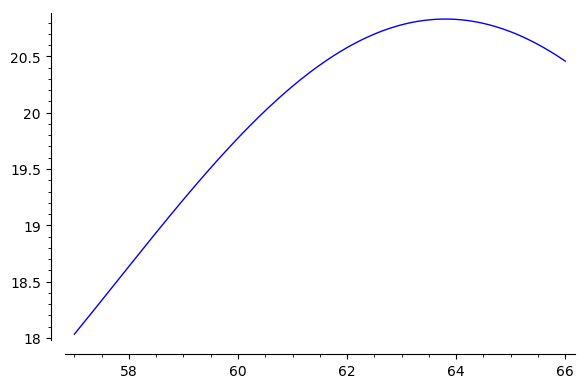

In [74]:
plot(odesol5.substitute(q1=0.9,q2=7,k=1/10),(t,9+48,9+48+9))


In [75]:
integral(q(t).substitute(q1=0.9,q2=7),(t,0,24))

10.8

In [ ]:
# Com que no puc baixar dels 18 graus, poc més puc millorar la q1. Per bisecció podria tractar 
# d'ajustar algun decimal més estudiant el valor de odesol5(9).

# Puc estudiar també l'efecte d'una millora en l'aïllament.


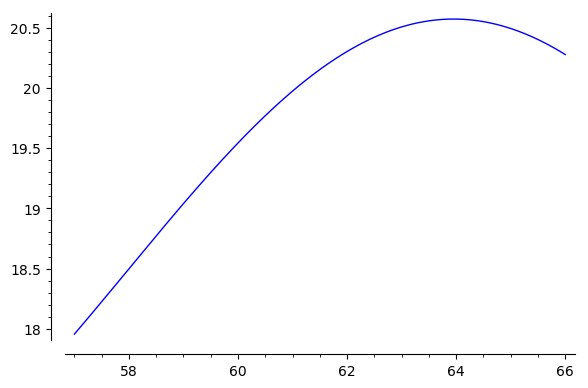

In [76]:
plot(odesol5.substitute(q1=0.8,q2=7,k=0.09),(t,9+48,9+48+9))

In [77]:
integral(q(t).substitute(q1=0.8,q2=7),(t,0,24))

9.600000000000001

In [ ]:
# Hem reduït bastant el cost energètic.

# Suposem que una rebaixa "r" (és a dir, passem a una nova k= k-r) del coeficient d'aïllament, te un cost de
# cost(r)= 13.3/(1/10-r) unitats. Entenem que arribar al aïllament total és impossible. Volem saber si surt a compte
# fer la inversió si la volem amortitzar en un any.

# Amb el model q1=0.9, q2=7, k=1/10, tenim un cost energètic diari de 10.8 unitats. El cost anual serà de


In [78]:
365*10.8

3942.00000000000

In [ ]:
# Amb el model q1=0.8, q2=7, k=1/10-1/100, tenim un cost energètic diari de 9.6 unitats. El cost anual serà de


In [79]:
365*9.6

3504.00000000000

In [ ]:
# I el cost de la millora es de


In [95]:
13.3/(1/10-1/100)

147.777777777778

In [ ]:
# Per tant, surt a compte. 

In [ ]:
# Escolliu un d'aquest exercicis alternatius

# 1. Volem un habitatge que durant les 24 hores estigui entre 18 i 22 graus.
# 2. Ara es tracta d'una oficina que treballa de nit, entre les 22:00 i les 8:00. Mateix rang de temperatures.
# 3. Qualsevol altre model diferent dels anteriors i del que he fet jo. Si voleu repetir el model que het fet jo, que
#    sigui amb una q(t) molt diferent.

# Per l'exercici escollit, definiu una funció q(t) apropiada i determineu unes bones constants que minimitzin 
# la despesa econòmica. Estudieu també l'efecte de la millora del aïllament.  

# Si el model que trieu no permet la integració exacte, feu integració numèrica.

# Exercici: Definiu una funció de temperatura exterior que cobreixi tot l'any, de manera que el rang de 
# temperatures entre nit i dia sigui sempre de 12 graus, i el rang de temperatura entre estiu i hivern sigui 
# de 25 graus. Posem que la temperatura màxima a l'estiu sigui de 35 graus. 
# Quina serà la temperatura mínima a la nit més freda?

# Com afectaria al càlcul de la funció òptima q(t) si fessim el estudi al llarg de tot l'any amb una funció 
# com aquesta?
